In [1]:
import sys
import os
import glob
import numpy as np
import pandas as pd
import h5py
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import re

In [2]:
sys.path.append(os.getcwd() + "/../../cds-backend/code/")
import cds_eua4 as eua

matplotlib.rcParams.update({"font.size": 20})
matplotlib.rcParams["figure.figsize"] = (20, 10)

no config found


In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


## Resort report_id for Meisei data

In [4]:
def find_gap(df, group_name, delta):
    singleseries = df
    singleseries['gap'] = singleseries[group_name].sort_values().diff() > delta
    return singleseries[singleseries.gap]

In [91]:
with eua.CDMDataset(glob.glob("/scratch/das/federico/INTERCOMPARISON_MAURITIUS/0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc")[0]) as file:
    display(file)
    df_meis = file.to_dataframe(groups=['observations_table'], variables=['observation_value', 'observed_variable', 'date_time', 'z_coordinate', 'report_id'])
    
df_meis = df_meis.sort_values(by='date_time')
gaps = find_gap(df = df_meis, group_name = 'date_time', delta = pd.to_timedelta('1 hour'))

rep_id = []
rid = 1
for i in gaps.date_time:
    byte_rid = [x.encode() for x in str(rid).zfill(10)]
    #byte_rid = [str(rid).zfill(10).encode()]
    rep_id.extend([byte_rid] * (len(df_meis[df_meis.date_time < i])-len(rep_id)))
    #rep_id.extend([str(rid).zfill(10)]* (len(df_meis[df_meis.date_time < i])-len(rep_id)))
    rid += 1
byte_rid = [x.encode() for x in str(rid).zfill(10)]
#byte_rid = [str(rid).zfill(10).encode()]
rep_id.extend([byte_rid] * (len(df_meis)-len(rep_id)))


sys.path.append("../../trajectory/")
from harvest_convert_to_netCDF import write_dict_h5

mode='w'
targetfile = '/users/staff/uvoggenberger/scratch/mauritius/0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc'
group = 'observations_table'

i = 'report_id'

with h5py.File(targetfile,  "a") as f:
    try:
        del f[group][i]
    except:
        pass
# ov_vars = np.array(rep_id)
alldict = {i:np.array(rep_id, dtype='S1')}
# alldict = pd.DataFrame({i:ov_vars})
write_dict_h5(targetfile, alldict, group, {i: {'compression': 'gzip'} }, [i]) 

log = ! h5repack -v GZIP=5 {targetfile} {targetfile}


File: <HDF5 file "0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc" (mode r)>
Filesize: 10.86 MB
Filename: /scratch/das/federico/INTERCOMPARISON_MAURITIUS/0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 4
 - V | dateindex____________________________________ : : (9,)
 - G | header_table_________________________________ : : 54
 - G | observations_table___________________________ : : 52
 - G | observed_variable____________________________ : : 9
 - V | recordindex__________________________________ : : (250268,)
 - V | recordtimestamp______________________________ : : (250268,)
 - G | sensor_configuration_________________________ : : 0
 - G | source_configuration_________________________ : : 32
 - G | station_configuration________________________ : : 44
 - G | station_configuration_codes__________________ : : 7
 - G | station_type_________________________________ : : 4
 - G | units___________

In [86]:
rep_id

[[b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'0000000001'],
 [b'000000

In [92]:
rep_id[-10:]

[[b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'4', b'2'],
 [b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'4', b'2'],
 [b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'4', b'2'],
 [b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'4', b'2'],
 [b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'4', b'2'],
 [b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'4', b'2'],
 [b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'4', b'2'],
 [b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'4', b'2'],
 [b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'4', b'2'],
 [b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'0', b'4', b'2']]

In [93]:
with eua.CDMDataset(glob.glob("/scratch/das/federico/INTERCOMPARISON_MAURITIUS/0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc")[0]) as file:
    display(file)
    display(file.observations_table)

File: <HDF5 file "0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc" (mode r)>
Filesize: 10.86 MB
Filename: /scratch/das/federico/INTERCOMPARISON_MAURITIUS/0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 4
 - V | dateindex____________________________________ : : (9,)
 - G | header_table_________________________________ : : 54
 - G | observations_table___________________________ : : 52
 - G | observed_variable____________________________ : : 9
 - V | recordindex__________________________________ : : (250268,)
 - V | recordtimestamp______________________________ : : (250268,)
 - G | sensor_configuration_________________________ : : 0
 - G | source_configuration_________________________ : : 32
 - G | station_configuration________________________ : : 44
 - G | station_configuration_codes__________________ : : 7
 - G | station_type_________________________________ : : 4
 - G | units___________

observations_table:

adjustment_id_____________________________________ : : (1007720, 20)
advanced_assimilation_feedback____________________ : : (1007720,)
advanced_homogenisation___________________________ : : (1007720,)
advanced_qc_______________________________________ : : (1007720,)
advanced_uncertainty______________________________ : : (1007720,)
bbox_max_latitude_________________________________ : : (1007720,)
bbox_max_longitude________________________________ : : (1007720,)
bbox_min_latitude_________________________________ : : (1007720,)
bbox_min_longitude________________________________ : : (1007720,)
code_table________________________________________ : : (1007720,)
conversion_flag___________________________________ : : (1007720,)
conversion_method_________________________________ : : (1007720,)
crs_______________________________________________ : : (1007720,)
data_policy_licence_______________________________ : : (1007720,)
date_time_________________________________________ :

In [94]:
with h5py.File(targetfile,  "r") as f:
    display(f.keys())
    print(f['observations_table']['report_id'][:])
    print(f['observations_table']['sensor_id'][:])

<KeysViewHDF5 ['crs', 'dateindex', 'header_table', 'observations_table', 'observed_variable', 'recordindex', 'recordtimestamp', 'sensor_configuration', 'source_configuration', 'station_configuration', 'station_configuration_codes', 'station_type', 'units', 'z_coordinate_type']>

[[b'0' b'0' b'0' ... b'0' b'0' b'1']
 [b'0' b'0' b'0' ... b'0' b'0' b'1']
 [b'0' b'0' b'0' ... b'0' b'0' b'1']
 ...
 [b'0' b'0' b'0' ... b'0' b'4' b'2']
 [b'0' b'0' b'0' ... b'0' b'4' b'2']
 [b'0' b'0' b'0' ... b'0' b'4' b'2']]
[[b'n' b'a' b'n' ... b'' b'' b'']
 [b'n' b'a' b'n' ... b'' b'' b'']
 [b'n' b'a' b'n' ... b'' b'' b'']
 ...
 [b'n' b'a' b'n' ... b'' b'' b'']
 [b'n' b'a' b'n' ... b'' b'' b'']
 [b'n' b'a' b'n' ... b'' b'' b'']]


## CUON Data

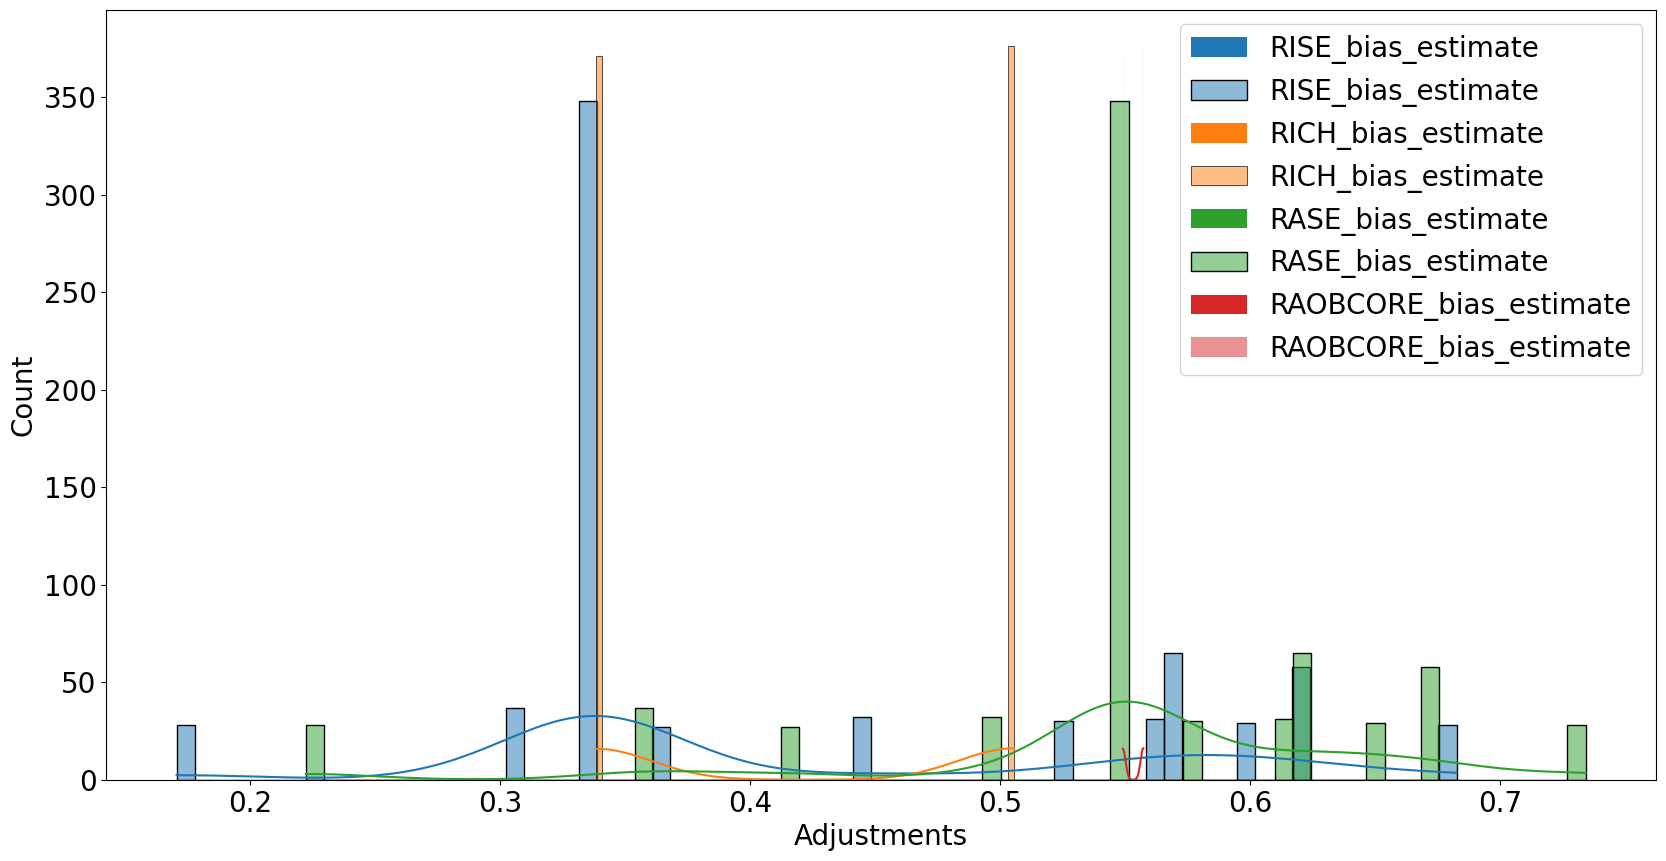

In [14]:
rq = {
    "statid": "11035",
    
    "date": ["20050101-20051231"],
    "variable": ["air_temperature"],# "wind_speed", "geopotential"],
    "format": "nc",
    "optional": ['obs_minus_an','obs_minus_bg', 'bias_estimate_method', 'RISE_bias_estimate', 'RICH_bias_estimate', 'RASE_bias_estimate', 'RAOBCORE_bias_estimate',],
    # "dummy": str(np.random.rand()),
}
df = eua.vm_request_wrapper(rq, overwrite=True)# , vm_url="http://127.0.0.1:8007")
df = df.to_dataframe()

df = df[df.plev == 5000]

hist_data = []
for i in ['RISE_bias_estimate', 'RICH_bias_estimate', 'RASE_bias_estimate', 'RAOBCORE_bias_estimate',]:# 'obs_minus_an','obs_minus_bg']:
    hist_data.append(df[i].dropna())
    ax = seaborn.histplot(hist_data[-1], label = i, kde=True, bins=70)
ax.set(xlabel='Adjustments')
plt.legend() 
plt.show()

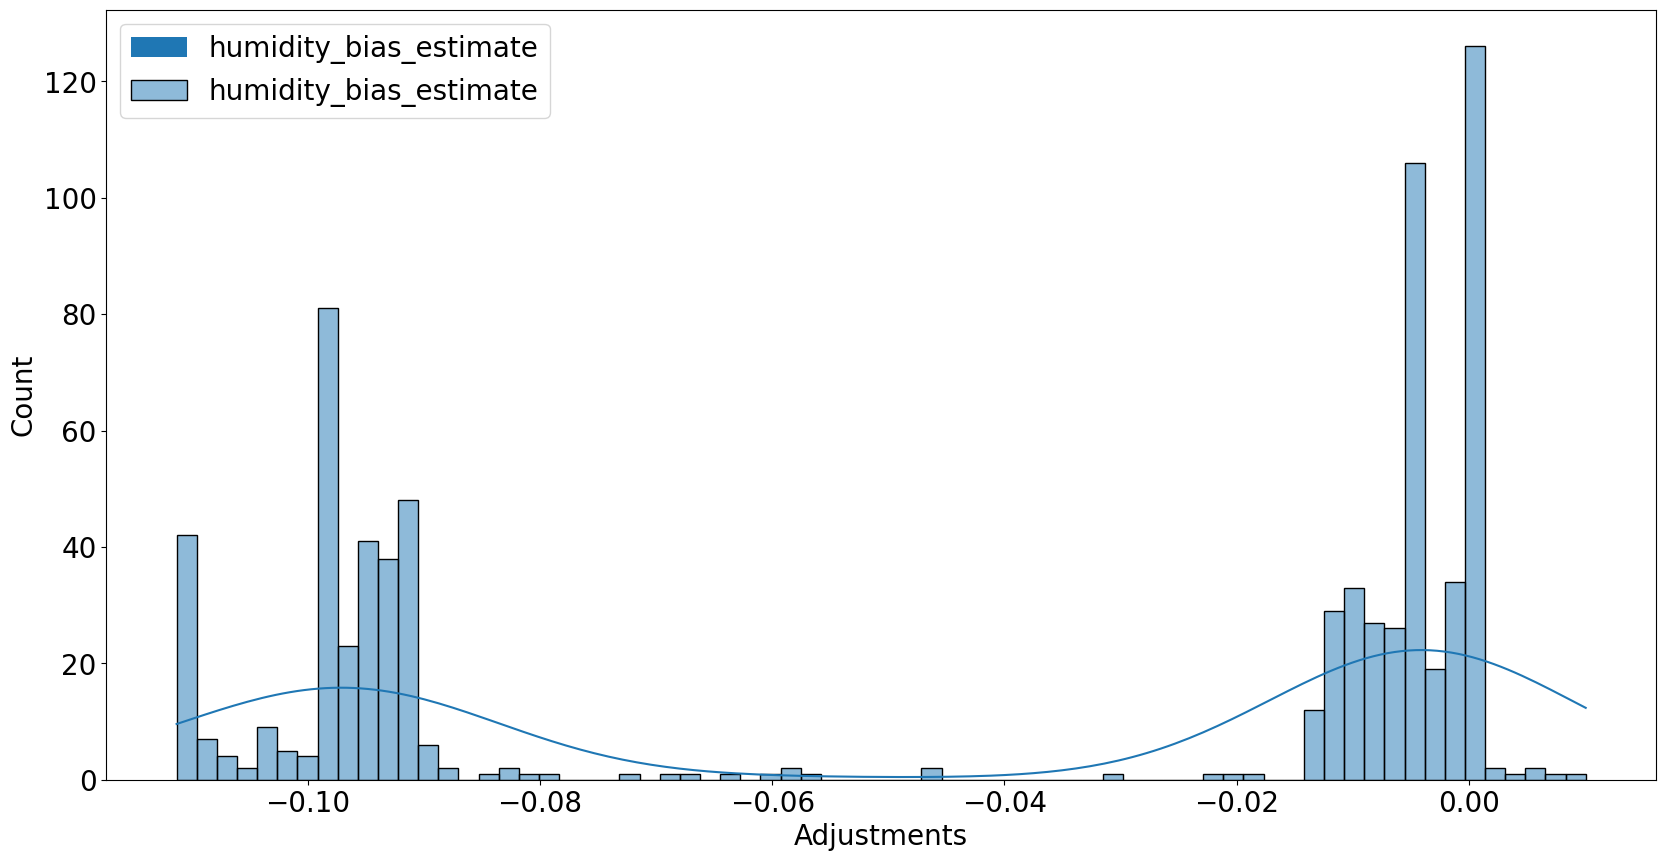

In [15]:
rq = {
    "statid": "11035",
    
    "date": ["20050101-20051231"],
    "variable": ["relative_humidity"],# "wind_speed", "geopotential"],
    "format": "nc",
    "optional": ['humidity_bias_estimate'],
    # "dummy": str(np.random.rand()),
}
df = eua.vm_request_wrapper(rq, overwrite=True)# , vm_url="http://127.0.0.1:8007")
df = df.to_dataframe()

df = df[df.plev == 30000]

hist_data = []
for i in ['humidity_bias_estimate']:# 'obs_minus_an','obs_minus_bg']:
    hist_data.append(df[i].dropna())
    ax = seaborn.histplot(hist_data[-1], label = i, kde=True, bins=70)
ax.set(xlabel='Adjustments')
plt.legend() 
plt.show()

## Mauritius Data

In [95]:
with eua.CDMDataset(glob.glob("/users/staff/uvoggenberger/scratch/mauritius/*vais*.nc")[0]) as file:
    display(file)
    df_vais = file.to_dataframe(groups=['observations_table'], variables=['observation_value', 'observed_variable', 'date_time', 'z_coordinate', 'report_id'])
    df_vais = df_vais[df_vais.observed_variable == 126]
with eua.CDMDataset('/users/staff/uvoggenberger/scratch/mauritius/0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc') as file:
    display(file)
    df_meis = file.to_dataframe(groups=['observations_table'], variables=['observation_value', 'observed_variable', 'date_time', 'z_coordinate', 'report_id'])
    df_meis = df_meis[df_meis.observed_variable == 126]


File: <HDF5 file "0-20000-0-61995_mauritius_harvested_vaisala_ascents.csv.nc" (mode r)>
Filesize: 5.95 MB
Filename: /users/staff/uvoggenberger/scratch/mauritius/0-20000-0-61995_mauritius_harvested_vaisala_ascents.csv.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 4
 - V | dateindex____________________________________ : : (9,)
 - G | header_table_________________________________ : : 54
 - G | observations_table___________________________ : : 52
 - G | observed_variable____________________________ : : 9
 - V | recordindex__________________________________ : : (56,)
 - V | recordtimestamp______________________________ : : (56,)
 - G | sensor_configuration_________________________ : : 0
 - G | source_configuration_________________________ : : 32
 - G | station_configuration________________________ : : 44
 - G | station_configuration_codes__________________ : : 7
 - G | station_type_________________________________ : : 4
 - G | units_____________________

File: <HDF5 file "0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc" (mode r)>
Filesize: 11.33 MB
Filename: /users/staff/uvoggenberger/scratch/mauritius/0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 4
 - V | dateindex____________________________________ : : (9,)
 - G | header_table_________________________________ : : 54
 - G | observations_table___________________________ : : 53
 - G | observed_variable____________________________ : : 9
 - V | recordindex__________________________________ : : (250268,)
 - V | recordtimestamp______________________________ : : (250268,)
 - G | sensor_configuration_________________________ : : 0
 - G | source_configuration_________________________ : : 32
 - G | station_configuration________________________ : : 44
 - G | station_configuration_codes__________________ : : 7
 - G | station_type_________________________________ : : 4
 - G | units______________

In [163]:
diffs = []
for i in df_vais.date_time.drop_duplicates():
    # print(i.date())
    meis_time = df_meis[df_meis.date_time.dt.date == i.date()]
    for j in meis_time.report_id.drop_duplicates():
        mt = meis_time[meis_time.report_id == j].date_time.iloc[0]
        dh = float((i-mt)/ np.timedelta64(1, 'h'))
        if np.logical_and( dh < -3, dh > -5):
            print(i, mt, "delta hours: ", dh)
            print(j)
            print()
            m_data = df_meis[df_meis.report_id == j]
            v_data = df_vais[df_vais.date_time == i]
            # plt.plot(m_data.observation_value, m_data.z_coordinate, label='Meisei')
            # plt.plot(v_data.observation_value, v_data.z_coordinate, label='Vaisala')
            # plt.gca().invert_yaxis()
            # plt.legend()
            # plt.grid()
            # plt.show()
            # plt.close()
            diffs.append(v_data[v_data.z_coordinate == find_nearest(v_data.z_coordinate, 5000)].iloc[0].observation_value - m_data[m_data.z_coordinate == find_nearest(m_data.z_coordinate, 5000)].iloc[0].observation_value)
        
    # if len(meis_time) > 0:
    #     print(meis_time.report_id.drop_duplicates())

2005-02-07 10:01:53 2005-02-07 13:36:55 delta hours:  -3.5838888888888887
0000000003

2005-02-07 19:31:41 2005-02-07 23:10:40 delta hours:  -3.649722222222222
0000000004

2005-02-08 10:00:56 2005-02-08 13:27:05 delta hours:  -3.4358333333333335
0000000006

2005-02-08 19:33:03 2005-02-08 23:05:41 delta hours:  -3.543888888888889
0000000007

2005-02-09 10:05:05 2005-02-09 13:36:05 delta hours:  -3.5166666666666666
0000000008

2005-02-09 19:17:51 2005-02-09 23:05:36 delta hours:  -3.7958333333333334
0000000009

2005-02-10 09:58:41 2005-02-10 13:36:52 delta hours:  -3.636388888888889
0000000010

2005-02-10 19:00:19 2005-02-10 22:38:37 delta hours:  -3.638333333333333
0000000011

2005-02-11 18:31:58 2005-02-11 22:16:57 delta hours:  -3.749722222222222
0000000014

2005-02-12 18:36:55 2005-02-12 22:11:29 delta hours:  -3.576111111111111
0000000016

2005-02-14 10:08:04 2005-02-14 13:23:29 delta hours:  -3.2569444444444446
0000000018

2005-02-14 18:00:36 2005-02-14 21:22:47 delta hours:  -3.369

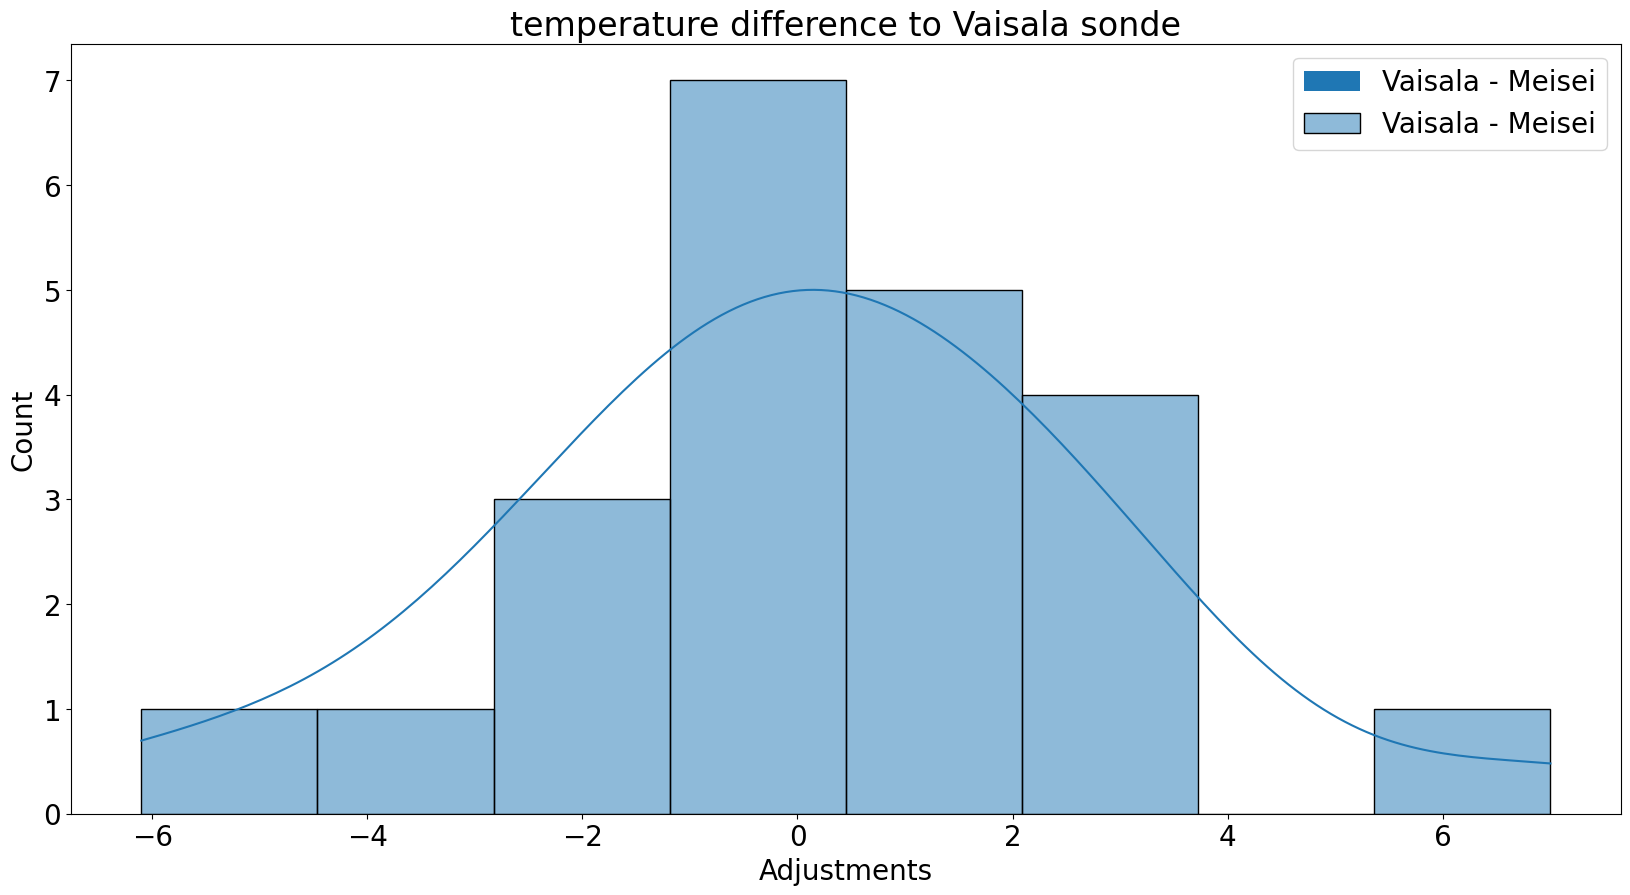

In [164]:
ax = seaborn.histplot(df_diff, label='Vaisala - Meisei', kde=True)
ax.set(xlabel="Adjustments")
ax.set(title='temperature difference to Vaisala sonde')
plt.legend()
plt.show()

## 2010 intercomparison 

In [ ]:
table = pd.read_csv('./table3685.csv')
interc = pd.read_csv('./wmo_intercomparison_2010.csv')

In [ ]:
table

In [ ]:
interc

In [25]:
len(interc.sonde_code.drop_duplicates()), len(interc.sonde_id.drop_duplicates()), len(interc.sonde_name.drop_duplicates())

(13, 15, 10)

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


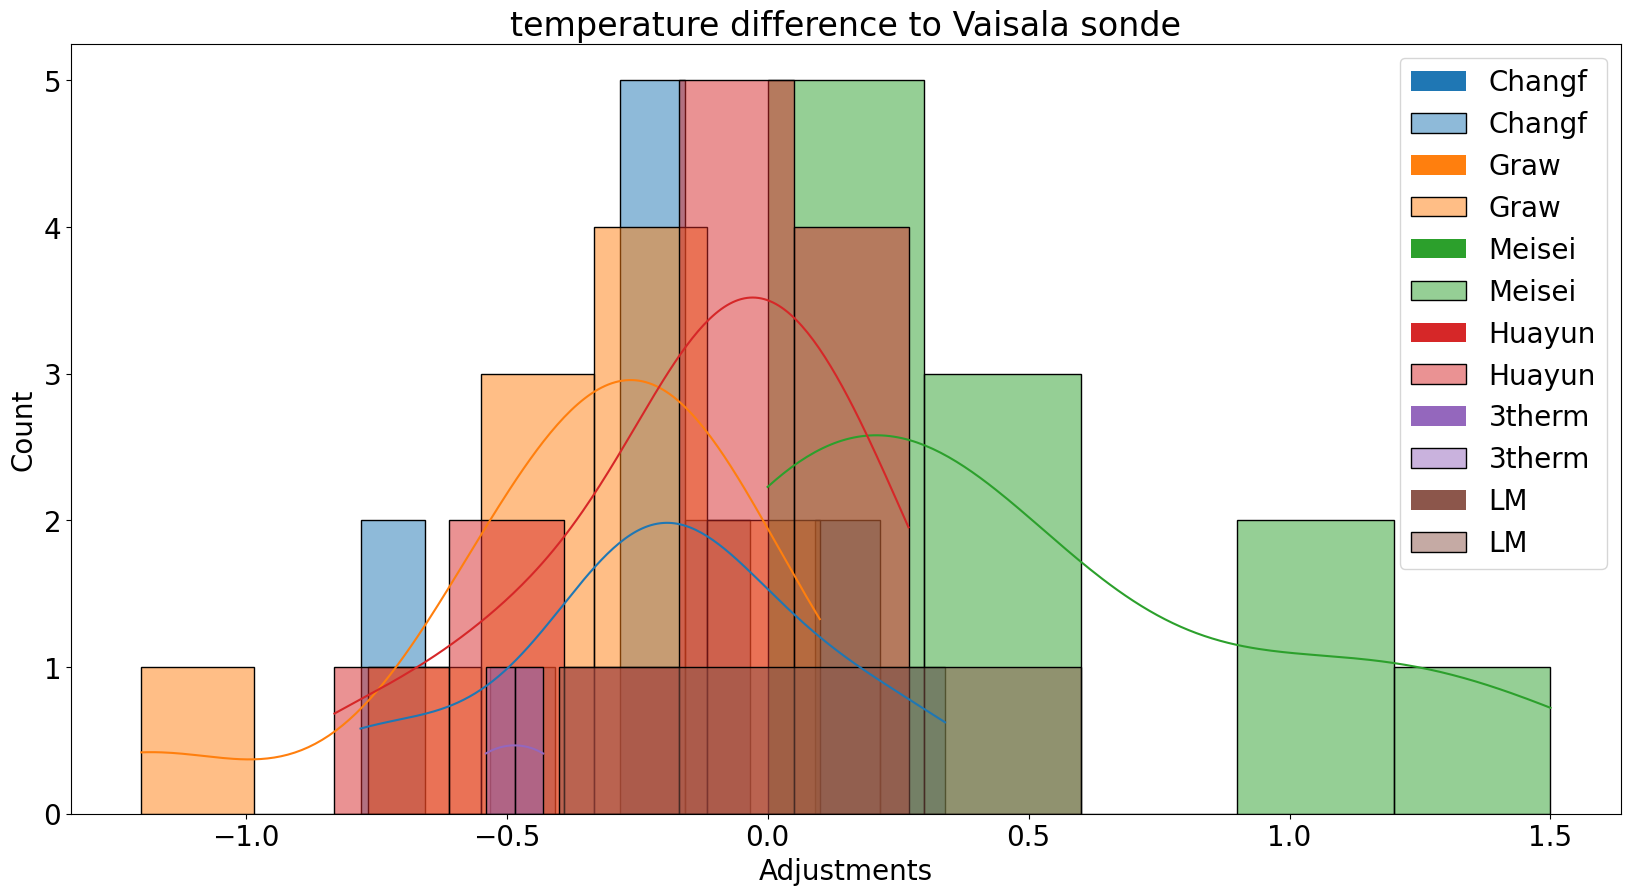

In [57]:
data_cleaned = {}

for asc in np.sort(glob.glob('/users/staff/uvoggenberger/CEUAS/CEUAS/public/intercomparisons/DATA/Vaisala/*')):
    try:
        ascentnr = asc[-3:]
        for i in glob.glob('/users/staff/uvoggenberger/CEUAS/CEUAS/public/intercomparisons/DATA/*/*.'+ascentnr):
            text = open(i, "r", encoding= 'unicode_escape')
            # display(text)

            #join() method combines all contents of 
            # csvfile.csv and formed as a string
            text = ''.join([j for j in text]) 

            # search and replace the contents
            text = text.replace("\t", ",") 
            text = re.sub(" +", ",", text)
            # output.csv is the output file opened in write mode
            x = open('./'+i.split('/')[-1],"w")

            # all the replaced text is written in the output.csv file
            x.writelines(text)
            x.close()

        yang_dfs = []
        for i in glob.glob('./*.'+ascentnr):
            df = pd.read_csv(i, delimiter=',', header=0, encoding= 'unicode_escape')
            # print(i)
            yang_dfs.append(df)

        labels = glob.glob('./*.'+ascentnr)
        compare_to = labels.index([s for s in labels if "Vaisala" in s][0])
        # print(compare_to)

        yang_dfs[compare_to].Pressure = pd.to_numeric(yang_dfs[compare_to].Pressure, errors='coerce')
        yang_dfs[compare_to] = yang_dfs[compare_to].dropna(subset = ['Pressure'])
        yang_dfs[compare_to].Temperature = pd.to_numeric(yang_dfs[compare_to].Temperature, errors='coerce')
        yang_dfs[compare_to] = yang_dfs[compare_to].dropna(subset = ['Temperature'])

        yang_dfs[compare_to] = yang_dfs[compare_to][yang_dfs[compare_to].Pressure == find_nearest(yang_dfs[compare_to].Pressure, 50)]

        for sonde in range(len(labels)):
            label = labels[sonde][2:].split('.')[0]
            if sonde == compare_to:
                continue

            yang_dfs[sonde].Pressure = pd.to_numeric(yang_dfs[sonde].Pressure, errors='coerce')
            yang_dfs[sonde] = yang_dfs[sonde].dropna(subset = ['Pressure'])
            yang_dfs[sonde].Temperature = pd.to_numeric(yang_dfs[sonde].Temperature, errors='coerce')
            yang_dfs[sonde] = yang_dfs[sonde].dropna(subset = ['Temperature'])

            for press in range(len(yang_dfs[compare_to])):
                delta_t = (
                    yang_dfs[compare_to].Temperature.iloc[press]
                    - yang_dfs[sonde][
                        yang_dfs[sonde].Pressure
                        == find_nearest(
                            np.array(yang_dfs[sonde].Pressure),
                            yang_dfs[compare_to].Pressure.iloc[press]
                        )
                    ].Temperature.values[0]
                )
            if label in list(data_cleaned.keys()):
                data_cleaned[label].append(delta_t)
            else:
                data_cleaned[label]=[delta_t]

    except:
        print('error')
            
for snd in data_cleaned.keys():
    data_cleaned[snd] = np.array(data_cleaned[snd])
    ax = seaborn.histplot(data_cleaned[snd][np.absolute(data_cleaned[snd]) < 3], label=snd, kde=True)
    ax.set(xlabel="Adjustments")
    ax.set(title='temperature difference to Vaisala sonde')
plt.legend()
plt.show()
